# Blending and Pasting Images

In [1]:
import cv2

In [2]:
img1 = cv2.imread('./DATA/dog_backpack.png')
img2 = cv2.imread('./DATA/watermark_no_copy.png')

In [3]:
pwd

'C:\\Users\\DELL\\Desktop\\OpenCV Course'

In [4]:
img1.shape

(1401, 934, 3)

In [5]:
img2.shape

(1280, 1277, 3)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

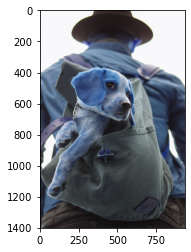

In [7]:
plt.imshow(img1);

In [8]:
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

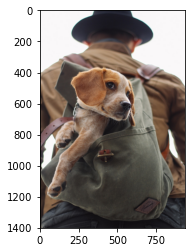

In [9]:
plt.imshow(img1);

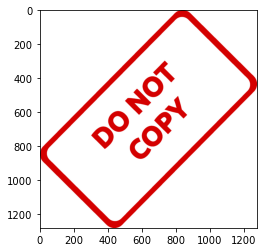

In [10]:
plt.imshow(img2);

In [11]:
img1 =cv2.resize(img1,(1200,1200))
img2 =cv2.resize(img2,(1200,1200))

In [12]:
blended_img = cv2.addWeighted(src1 = img1,alpha = 0.5,src2 = img2,beta = 0.5,gamma = 0)

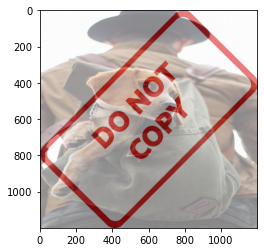

In [13]:
plt.imshow(blended_img);

# Overlaying images of different sizes

In [14]:
img1 = cv2.imread('./DATA/dog_backpack.png')
img2 = cv2.imread('./DATA/watermark_no_copy.png')
img2 = cv2.resize(img2,(600,700))
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

large_img = img1
small_img = img2

In [15]:
x_offset = 0
y_offset = 50

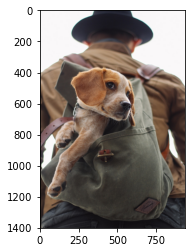

In [16]:
plt.imshow(large_img);

In [17]:
large_img.shape

(1401, 934, 3)

In [18]:
img2.shape

(700, 600, 3)

In [19]:
len(large_img[:,0])

1401

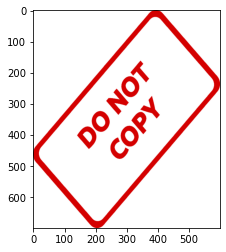

In [20]:
plt.imshow(small_img);

In [21]:
large_img[y_offset:y_offset + small_img.shape[0],x_offset:x_offset + small_img.shape[1]] = small_img

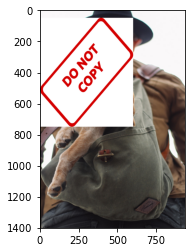

In [22]:
plt.imshow(large_img);

## Mask based blending

In [23]:
img1 = cv2.imread('./DATA/dog_backpack.png')
img2 = cv2.imread('./DATA/watermark_no_copy.png')
img2 =cv2.resize(img2,(600,600))

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

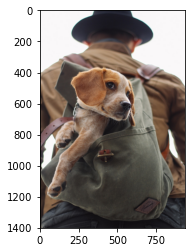

In [24]:
plt.imshow(img1);

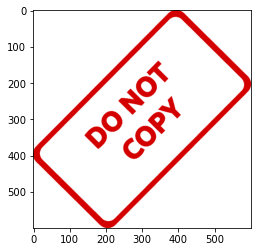

In [25]:
plt.imshow(img2);

### Creating a Region of Interest (ROI)

In [26]:
img1.shape

(1401, 934, 3)

In [27]:
x_offset = 934 - 600
y_offset = 1401 - 600

In [28]:
roi = img1[y_offset:y_offset + 600,x_offset : x_offset + 600]

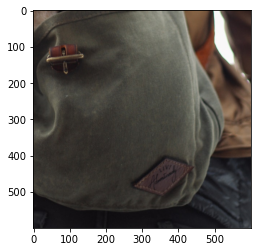

In [29]:
plt.imshow(roi);

In [30]:
roi.shape

(600, 600, 3)

## Creating a mask

In [31]:
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

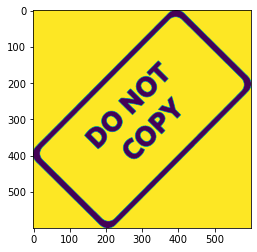

In [32]:
plt.imshow(img2gray);

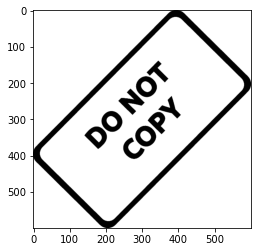

In [33]:
plt.imshow(img2gray,cmap = 'gray')

In [34]:
img2gray.shape

(600, 600)

In [35]:
mask_inv = cv2.bitwise_not(img2gray)

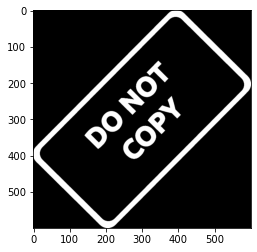

In [36]:
plt.imshow(mask_inv,cmap = 'gray');

In [37]:
mask_inv.shape

(600, 600)

## Using bitwise or to create a mask

In [38]:
# Bitwise or only operates on the pixels where mask is not 0
# Elements of fg where mask is 0 will be made 0 hence black
fg = cv2.bitwise_or(img2,img2,mask = mask_inv)

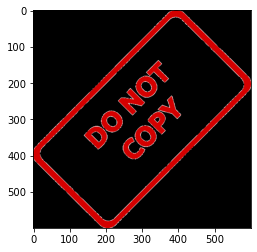

In [39]:
plt.imshow(fg);

In [40]:
final_roi = cv2.bitwise_or(roi,fg)

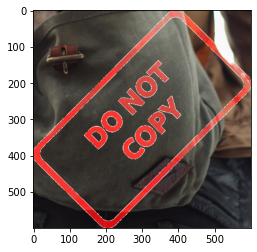

In [41]:
plt.imshow(final_roi);

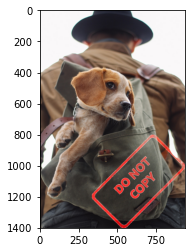

In [42]:
large_img = img1
small_img = final_roi


large_img[y_offset:y_offset+small_img.shape[0], x_offset:x_offset+small_img.shape[1]] = small_img

plt.imshow(large_img);

### Relevant Stack Overflow links:
1. https://stackoverflow.com/questions/10469235/opencv-apply-mask-to-a-color-image/38493075
2. https://stackoverflow.com/questions/14063070/overlay-a-smaller-image-on-a-larger-image-python-opencv
3. https://docs.opencv.org/3.4/d0/d86/tutorial_py_image_arithmetics.html